# Explore deltas

Explore the climatologies and deltas produced for some sample grid cells. Useful for verifying application of the delta method. 

Visualize the climatologies and deltas for the CCSM4 adjustment using for four grid cells.

In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt

scratch_dir = os.getenv("SCRATCH_DIR")
clim_dir = os.path.join(scratch_dir, "WRF", "climatologies", "tsk")
clim_fp = os.path.join(clim_dir, "tsk_max_{}_2008-2017_climatology.nc")
del_fp = clim_fp.replace("climatologies", "deltas").replace("climatology", "deltas")

In [2]:
era_clim_ds = xr.load_dataset(clim_fp.format("era"))
gfdl_clim_ds = xr.load_dataset(clim_fp.format("gfdl"))
ccsm_clim_ds = xr.load_dataset(clim_fp.format("ccsm"))
gfdl_del_da = xr.load_dataarray(del_fp.format("gfdl"))
ccsm_del_da = xr.load_dataarray(del_fp.format("ccsm"))

## Climatologies

CCSM4 climatologies across MODIS periods:

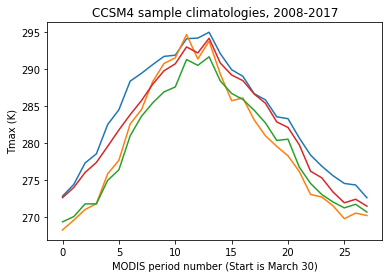

In [3]:
xidx = [60, 180, 60, 180]
yidx = [75, 75, 125, 125]
for x,y in zip(xidx, yidx):
    plt.plot(ccsm_clim_ds.tsk.values[:,y,x])
    
plt.title("CCSM4 sample climatologies, 2008-2017")
plt.xlabel("MODIS period number (Start is March 30)")
plt.ylabel("Tmax (K)")
plt.show()

CCSM4 climatology for single period (10)

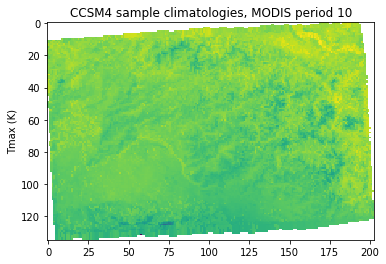

In [4]:
arr = ccsm_clim_ds.tsk.values[10,...]
plt.imshow(arr, interpolation="None")
plt.title("CCSM4 sample climatologies, MODIS period 10")
plt.ylabel("Tmax (K)")
plt.show()

GFDL CM3 climatology:

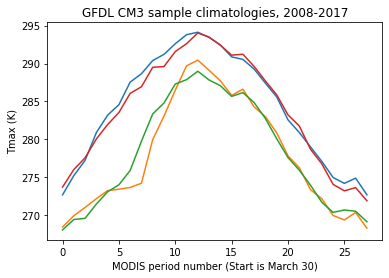

In [5]:
for x,y in zip(xidx, yidx):
    plt.plot(gfdl_clim_ds.tsk.values[:,y,x])
    
plt.title("GFDL CM3 sample climatologies, 2008-2017")
plt.xlabel("MODIS period number (Start is March 30)")
plt.ylabel("Tmax (K)")
plt.show()

GFDL CM3 climatology for single period (10)

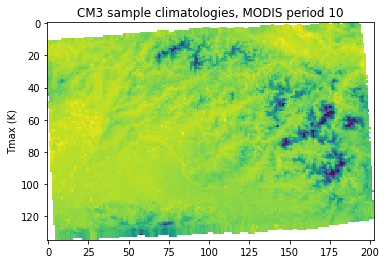

In [6]:
arr = gfdl_clim_ds.tsk.values[10,...]
plt.imshow(arr, interpolation="None")
plt.title("CM3 sample climatologies, MODIS period 10")
plt.ylabel("Tmax (K)")
plt.show()

ERA-Interim climatology:

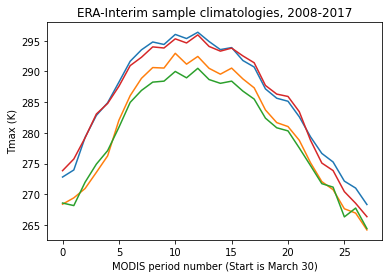

In [7]:
for x,y in zip(xidx, yidx):
    plt.plot(era_clim_ds.tsk.values[:,y,x])
    
plt.title("ERA-Interim sample climatologies, 2008-2017")
plt.xlabel("MODIS period number (Start is March 30)")
plt.ylabel("Tmax (K)")
plt.show()

ERA climatology for single period (10)

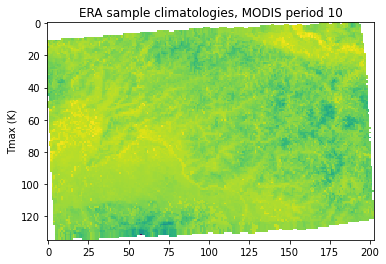

In [8]:
arr = era_clim_ds.tsk.values[10,...]
plt.imshow(arr, interpolation="None")
plt.title("ERA sample climatologies, MODIS period 10")
plt.ylabel("Tmax (K)")
plt.show()

## Deltas

CCSM4 deltas:

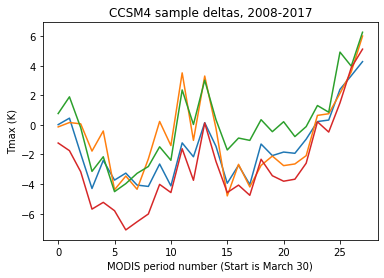

In [9]:
for x,y in zip(xidx, yidx):
    plt.plot(ccsm_del_da.values[:,y,x])
    
plt.title("CCSM4 sample deltas, 2008-2017")
plt.xlabel("MODIS period number (Start is March 30)")
plt.ylabel("Tmax (K)")
plt.show()

GFDL3 climatology:

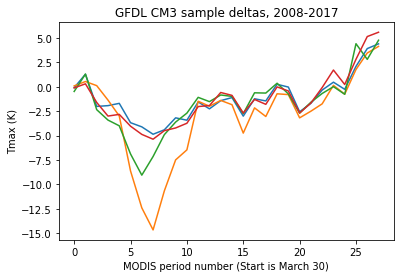

In [10]:
for x,y in zip(xidx, yidx):
    plt.plot(gfdl_del_da.values[:,y,x])
    
plt.title("GFDL CM3 sample deltas, 2008-2017")
plt.xlabel("MODIS period number (Start is March 30)")
plt.ylabel("Tmax (K)")
plt.show()

## Adjusted

Compare original with adjusted time series. For each model and period, view a sample of three time series (3 seasons) for a sample of 2 locations.

In [11]:
def plot_adj_comparison(del_da, reproj_fp, adj_fp, years, idx):
    def subset_ds(ds, year, idx):
        dates = [date for date in ds.date.values if year in str(date)]
        return ds.tsk.sel(date=slice(dates[0], dates[-1])).values[:,idx[0],idx[1]] 
        
    reproj_ds = xr.load_dataset(reproj_fp)
    adj_ds = xr.load_dataset(adj_fp)
    
    gcm = reproj_fp.split("_")[-3]
    fig, ax = plt.subplots(1,4, figsize=(20, 4))
    ax[0].plot(del_da.values[:,idx[0],idx[1]])
    ax[0].set_title(f"deltas ({gcm} - era)")
    ax[0].set_ylabel("Tmax (K)")
    ax[0].set_xlabel("MODIS period number")
    for year, axi in zip(years, ax[1:]):
        axi.plot(subset_ds(reproj_ds, year, idx), label="base")
        axi.plot(subset_ds(adj_ds, year, idx), label="adj")
        axi.set_xlabel("MODIS period number")
        axi.set_ylabel("Tmax (K)")
        axi.set_title(f"{year}")
        axi.legend()
    
    fig.suptitle(f"Adjusted / Unadjusted WRF ({gcm}) TSK values (max). Grid cell used: row: {idx[0]}, col: {idx[1]}", y=1.01)
    plt.legend()
    plt.show()

#### GFDL CM3

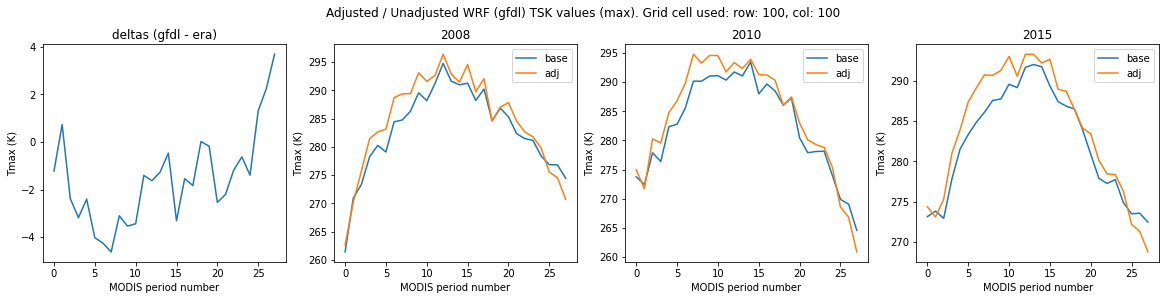

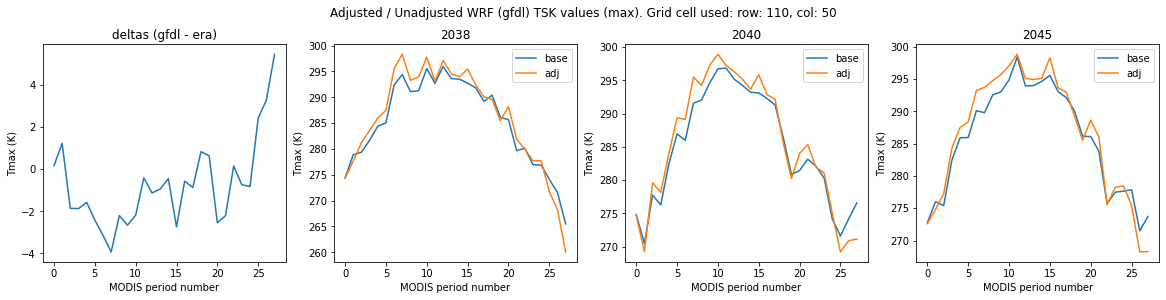

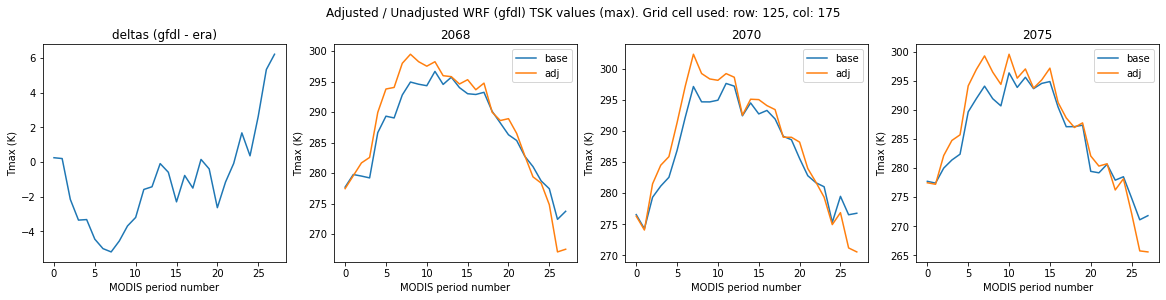

In [12]:
out_dir = os.path.join(os.getenv("OUTPUT_DIR"), "aligned-WRF-MODIS", "WRF")
adj_fp = os.path.join(out_dir, "tsk_max_{}_{}_aligned.nc")
reproj_fp = os.path.join(scratch_dir, "WRF", "reprojected", "tsk", "netcdf", "tsk_max_{}_{}_reprojected.nc")

years = ["2008", "2010", "2015"]
idx = [100, 100]
gcm = "gfdl"
plot_adj_comparison(
    gfdl_del_da,
    reproj_fp.format(gcm, "2007-2017"), 
    adj_fp.format(gcm, "2008-2017"), 
    years, 
    idx
)

years = ["2038", "2040", "2045"]
idx = [110, 50]
plot_adj_comparison(
    gfdl_del_da,
    reproj_fp.format(gcm, "2037-2047"), 
    adj_fp.format(gcm, "2038-2047"), 
    years, 
    idx
)

years = ["2068", "2070", "2075"]
idx = [125, 175]
plot_adj_comparison(
    gfdl_del_da,
    reproj_fp.format(gcm, "2067-2077"), 
    adj_fp.format(gcm, "2068-2077"), 
    years, 
    idx
)

#### NCAR CCSM4

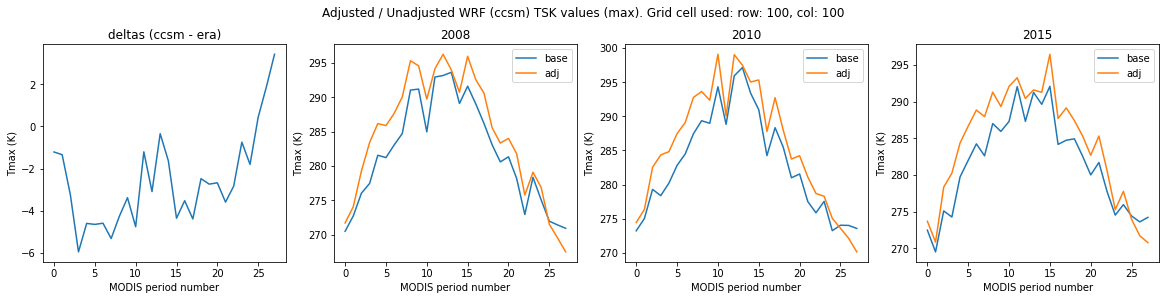

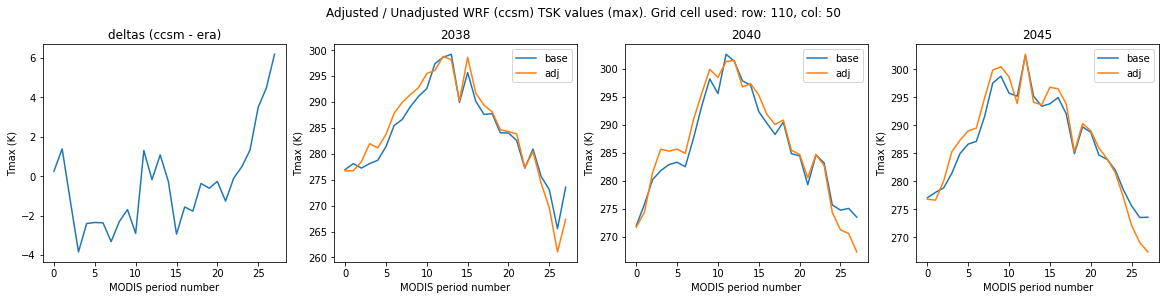

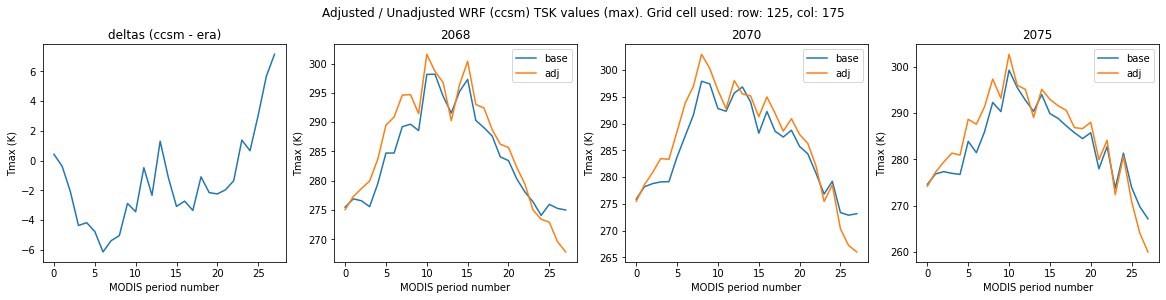

In [13]:
years = ["2008", "2010", "2015"]
idx = [100, 100]
gcm = "ccsm"
plot_adj_comparison(
    ccsm_del_da,
    reproj_fp.format(gcm, "2007-2017"), 
    adj_fp.format(gcm, "2008-2017"), 
    years, 
    idx
)

years = ["2038", "2040", "2045"]
idx = [110, 50]
plot_adj_comparison(
    ccsm_del_da,
    reproj_fp.format(gcm, "2037-2047"), 
    adj_fp.format(gcm, "2038-2047"), 
    years, 
    idx
)

years = ["2068", "2070", "2075"]
idx = [125, 175]
plot_adj_comparison(
    ccsm_del_da,
    reproj_fp.format(gcm, "2067-2077"), 
    adj_fp.format(gcm, "2068-2077"), 
    years, 
    idx
)